In [1]:
import pandas as pan

In [36]:
baby=pan.read_csv("C:\\Users\\user\\Downloads\\babies.csv")
baby.head(5)

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [7]:
baby.shape

(1236, 8)

In [38]:
baby.parity.unique()

array([0, 1], dtype=int64)

In [8]:
baby.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

In [9]:
baby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [10]:
baby.isnull()

,case,bwt,gestation,parity,age,height,weight,smoke
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1231,False,False,False,False,False,False,False,False
1232,False,False,False,False,False,False,False,False
1233,False,False,False,False,False,False,False,False
1234,False,False,False,False,False,False,False,False


In [13]:
baby.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [15]:
baby.fillna(value=0,inplace=True)

In [16]:
baby.describe().T

,count,mean,std,min,25%,50%,75%,max
case,1236.0,618.500000,356.946775,1.0,309.75,618.5,927.25,1236.0
bwt,1236.0,119.576861,18.236452,55.0,108.75,120.0,131.00,176.0
gestation,1236.0,276.400485,32.663624,0.0,272.00,280.0,288.00,353.0
parity,1236.0,0.254854,0.435956,0.0,0.00,0.0,1.00,1.0
age,1236.0,27.211165,5.879759,0.0,23.00,26.0,31.00,45.0
height,1236.0,62.907767,8.836137,0.0,62.00,64.0,66.00,72.0
weight,1236.0,124.879450,29.920286,0.0,112.00,125.0,138.00,250.0
smoke,1236.0,0.391586,0.488302,0.0,0.00,0.0,1.00,1.0


### Target Variables

In [18]:
X = baby.drop('parity',axis=1)
y = baby['parity']

<AxesSubplot:>

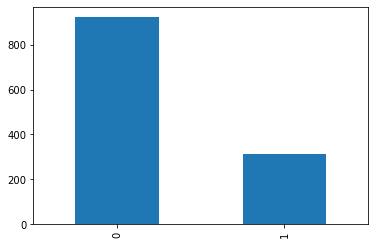

In [12]:
baby['parity'].value_counts().plot.bar()

<AxesSubplot:>

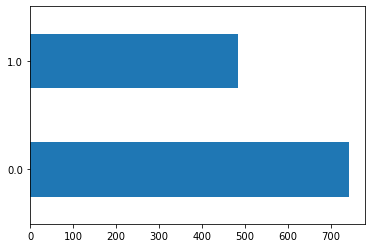

In [63]:
baby['smoke'].value_counts().plot.barh()

### Train-Test_Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import*

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [23]:
x_train.sum()

case         576956.0
bwt          111430.0
gestation    256428.0
age           25265.0
height        58240.0
weight       116000.0
smoke           361.0
dtype: float64

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression as lr

In [28]:
logi=lr()

In [29]:
logi.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred=logi.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7540453074433657

In [44]:
pre=logi.predict([[2,125,282.0,3,64.0,16.8,1.0]])
if pre==0:
    print("is parity",pre)
else:
    print("no parity",pre)

no parity [1]


### Pickle file create

In [48]:
import pickle

# open file in binary mode
with open('preganancy.pickle', 'wb') as f:
    # dump the data into the file
    pickle.dump(baby, f)

In [64]:
with open('preganancy.pickle', 'rb') as f:
    # load the data from the file
    baby= pickle.load(f)

In [65]:
baby.to_csv("preganancy.csv",index=False)